In [32]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df = pd.read_csv('/content/news.csv', encoding='ISO-8859-1')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The âPâ in PBS Should Stand for âPlutocr...,The âPâ in PBS Should Stand for âPlutocr...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia âPresident Obama conve...",REAL


In [35]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [36]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The âPâ in PBS Should Stand for âPlutocr...,The âPâ in PBS Should Stand for âPlutocr...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia âPresident Obama conve...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [37]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [38]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [39]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

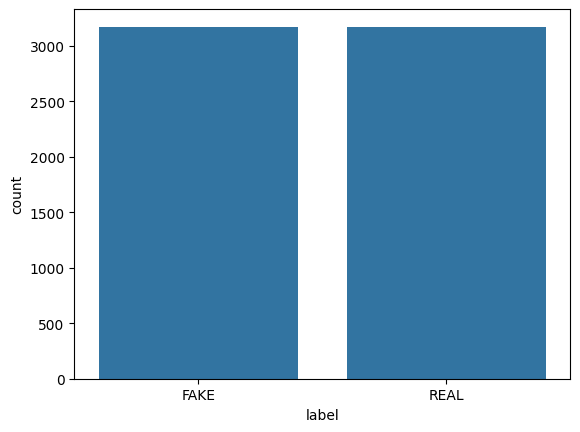

In [40]:
# plotting the values of fake and real
sns.countplot(x='label',data=df)

In [41]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,title,text,label
0,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The âPâ in PBS Should Stand for âPlutocr...,The âPâ in PBS Should Stand for âPlutocr...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia âPresident Obama conve...",REAL


In [42]:
df['label']=df['label'].map({'FAKE':1,'REAL':0})
df['label']

0       1
1       1
2       0
3       1
4       0
       ..
6330    0
6331    1
6332    1
6333    0
6334    0
Name: label, Length: 6335, dtype: int64

In [43]:
df=df[['text','label']]
df

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,U.S. Secretary of State John F. Kerry said Mon...,0
3,"â Kaydee King (@KaydeeKing) November 9, 2016...",1
4,It's primary day in New York and front-runners...,0
...,...,...
6330,The State Department told the Republican Natio...,0
6331,The âPâ in PBS Should Stand for âPlutocr...,1
6332,Anti-Trump Protesters Are Tools of the Oligar...,1
6333,"ADDIS ABABA, Ethiopia âPresident Obama conve...",0


In [44]:
tweets=df.text
tweets

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       â Kaydee King (@KaydeeKing) November 9, 2016...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The âPâ in PBS Should Stand for âPlutocr...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia âPresident Obama conve...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [45]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
tweets

0       Daniel Greenfield , a Shillman Journalism Fell...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U . S . Secretary of State John F . Kerry said...
3       â   Kaydee King ( @KaydeeKing ) November 9 ,...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The â   Pâ   in PBS Should Stand for â  ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    ADDIS ABABA , Ethiopia â   President Obama c...
6334    Jeb Bush Is Suddenly Attacking Trump . Here's ...
Name: text, Length: 6335, dtype: object

In [46]:
tweets=tweets.str.replace('[a-zA-Z0-9]+',' ')
tweets

0       Daniel Greenfield , a Shillman Journalism Fell...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U . S . Secretary of State John F . Kerry said...
3       â   Kaydee King ( @KaydeeKing ) November 9 ,...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The â   Pâ   in PBS Should Stand for â  ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    ADDIS ABABA , Ethiopia â   President Obama c...
6334    Jeb Bush Is Suddenly Attacking Trump . Here's ...
Name: text, Length: 6335, dtype: object

In [47]:
# removing words length less than three letters
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0       Daniel Greenfield Shillman Journalism Fellow t...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       Secretary State John Kerry said Monday that wi...
3       Kaydee King KaydeeKing November 2016 The lesso...
4       primary day New York and front-runners Hillary...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The PBS Should Stand for Plutocraticâ Pentagon...
6332    Anti-Trump Protesters Are Tools the Oligarchy ...
6333    ADDIS ABABA Ethiopia President Obama convened ...
6334    Jeb Bush Suddenly Attacking Trump Here Why Tha...
Name: text, Length: 6335, dtype: object

In [48]:
#stemming
from nltk.stem import SnowballStemmer
st=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[st.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets


0       daniel greenfield shillman journal fellow the ...
1       googl pinterest digg linkedin reddit stumbleup...
2       secretari state john kerri said monday that wi...
3       kayde king kaydeek novemb 2016 the lesson from...
4       primari day new york and front-runn hillari cl...
                              ...                        
6330    the state depart told the republican nation co...
6331    the pbs should stand for plutocraticâ pentagon...
6332    anti-trump protest are tool the oligarchi refo...
6333    addi ababa ethiopia presid obama conven meet w...
6334    jeb bush sudden attack trump here whi that mat...
Name: text, Length: 6335, dtype: object

In [49]:
# removing stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

0       daniel greenfield shillman journal fellow free...
1       googl pinterest digg linkedin reddit stumbleup...
2       secretari state john kerri said monday stop pa...
3       kayde king kaydeek novemb 2016 lesson tonight ...
4       primari day new york front-runn hillari clinto...
                              ...                        
6330    state depart told republican nation committe c...
6331    pbs stand plutocraticâ pentagonâ post oct 2016...
6332    anti-trump protest tool oligarchi reform alway...
6333    addi ababa ethiopia presid obama conven meet l...
6334    jeb bush sudden attack trump whi matter jeb bu...
Name: text, Length: 6335, dtype: object

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<6335x56472 sparse matrix of type '<class 'numpy.float64'>'
	with 1678191 stored elements in Compressed Sparse Row format>

In [51]:
print(data)

  (0, 17007)	0.019152620949756685
  (0, 8567)	0.016704037546251077
  (0, 2569)	0.028392568908457816
  (0, 24523)	0.028041426854330104
  (0, 8993)	0.029270356529011738
  (0, 10294)	0.013026717996196877
  (0, 6746)	0.011366822223187092
  (0, 45791)	0.02241925271816041
  (0, 34945)	0.013928608422140335
  (0, 45572)	0.02213588844130912
  (0, 13499)	0.023013396730763486
  (0, 35789)	0.02482448072896415
  (0, 55510)	0.024090907888416356
  (0, 47598)	0.015502503657102007
  (0, 29126)	0.011136892129350134
  (0, 31820)	0.01184821362596032
  (0, 44307)	0.022907117234902317
  (0, 51864)	0.028623359200531114
  (0, 41170)	0.022599501408257307
  (0, 11262)	0.01444241268097428
  (0, 5719)	0.015329161941990018
  (0, 47757)	0.018874835047762502
  (0, 9624)	0.023139905629161232
  (0, 53248)	0.020043942816718247
  (0, 44991)	0.01896299611075181
  :	:
  (6334, 20307)	0.023046845359583023
  (6334, 50426)	0.012212859244132845
  (6334, 48228)	0.027574057999610817
  (6334, 14418)	0.06378965053120984
  (6334, 

In [52]:
data.shape

(6335, 56472)

In [53]:
y=df['label'].values
y

array([1, 1, 0, ..., 1, 0, 0])

In [54]:
x=data
x

<6335x56472 sparse matrix of type '<class 'numpy.float64'>'
	with 1678191 stored elements in Compressed Sparse Row format>

In [55]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

<4434x56472 sparse matrix of type '<class 'numpy.float64'>'
	with 1161452 stored elements in Compressed Sparse Row format>

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
knn=KNeighborsClassifier(n_neighbors=7)
base=BernoulliNB()
model=SVC()
lst=[knn,base,model]

In [60]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('model is:',i)
  print(y_pred)
  print('confusion matrix:',confusion_matrix(y_test,y_pred))
  print('accuracy_score:',accuracy_score(y_test,y_pred))

  print('*'*100)

model is: KNeighborsClassifier(n_neighbors=7)
[1 1 1 ... 1 0 1]
confusion matrix: [[123 810]
 [  0 968]]
accuracy_score: 0.5739084692267228
****************************************************************************************************
model is: BernoulliNB()
[1 1 0 ... 1 0 0]
confusion matrix: [[709 224]
 [138 830]]
accuracy_score: 0.8095739084692267
****************************************************************************************************
model is: SVC()
[1 1 1 ... 1 0 0]
confusion matrix: [[835  98]
 [ 39 929]]
accuracy_score: 0.9279326670173593
****************************************************************************************************
